<a href="https://colab.research.google.com/github/akshatsingh523/UNDERWATER-OBJECT-DETECTION-USING-YOLO-V8/blob/main/UNDER_WATER_OBJECT_DETECTION_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 12.1MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 246.4ms
Speed: 13.3ms preprocess, 246.4ms inference, 20.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/y8_data

/content/drive/MyDrive/y8_data


In [ ]:
!ls

data.yaml  test  train	valid


In [ ]:
%cd /content/drive/MyDrive/y8_data
!ls


/content/drive/MyDrive/y8_data
data.yaml  runs  test  train  valid  yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=96 plots=True

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=109, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

# RESULTS ON TRAIN DATA (25 EPOCHS)

In [ ]:
!ls runs/detect/train2/

args.yaml					     results.png
confusion_matrix_normalized.png			     train_batch0.jpg
confusion_matrix.png				     train_batch105.jpg
events.out.tfevents.1692998431.884be4d4035a.19392.0  train_batch106.jpg
F1_curve.png					     train_batch107.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     weights
results.csv


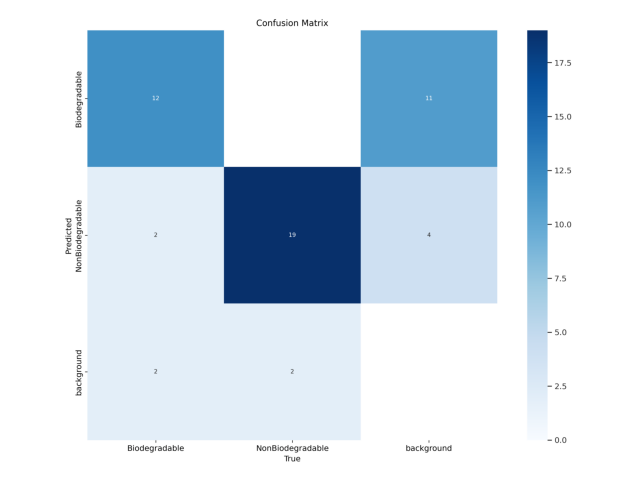

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load and display the image
image_path = 'runs/detect/train2/confusion_matrix.png'
image = imread(image_path)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


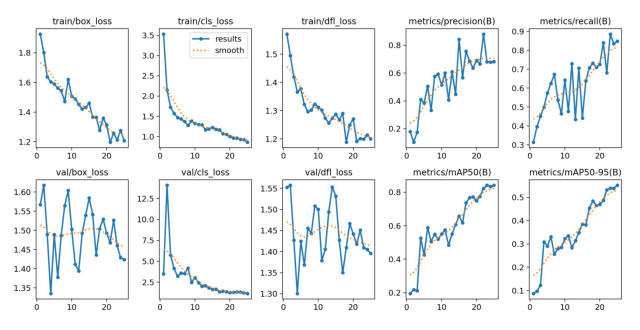

In [ ]:
image_path_1= 'runs/detect/train2/results.png'
image = imread(image_path_1)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

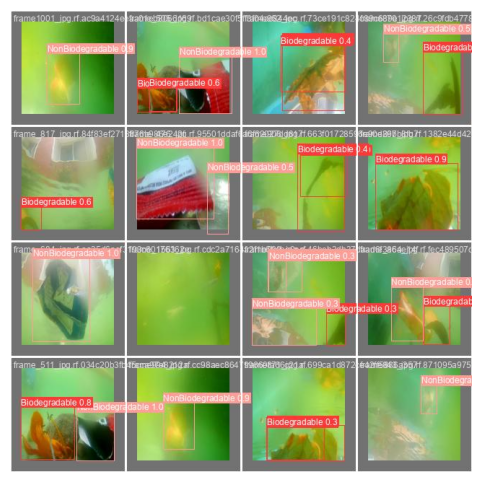

In [ ]:
image_path_2 = 'runs/detect/train2/val_batch0_pred.jpg'
image = imread(image_path_2)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# VALIDATION DATA

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/y8_data/runs/detect/train2/weights/best.pt data=data.yaml epochs=25 imgsz=96 plots=True

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/y8_data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.17it/s]
                   all         31         37      0.838      0.807       0.87      0.608
         Biodegradable         31         16      0.737      0.875      0.869      0.666
      NonBiodegradable         31         21      0.939      0.739      0.871       0.55
Speed: 0.1ms preprocess, 25.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val


#INFERENCE WITH CUSTOM MODEL

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/y8_data/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/y8_data/test/images

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/15 /content/drive/MyDrive/y8_data/test/images/frame1034_jpg.rf.530302b1c4fb45e57e10590df798be7b.jpg: 128x128 1 NonBiodegradable, 59.8ms
image 2/15 /content/drive/MyDrive/y8_data/test/images/frame1318_jpg.rf.4df001967c4b421fe12a485276430bd6.jpg: 128x128 1 NonBiodegradable, 54.8ms
image 3/15 /content/drive/MyDrive/y8_data/test/images/frame164_jpg.rf.519f922556b701b81ddcb336d42ab7a1.jpg: 128x128 1 NonBiodegradable, 53.9ms
image 4/15 /content/drive/MyDrive/y8_data/test/images/frame2517_jpg.rf.4df87574d16c9b83a229892906429cd7.jpg: 128x128 1 Biodegradable, 33.0ms
image 5/15 /content/drive/MyDrive/y8_data/test/images/frame626_jpg.rf.1e280480a6c4db8f565624a68967969a.jpg: 128x128 1 Biodegradable, 35.4ms
image 6/15 /content/drive/MyDrive/y8_data/test/images/frame644_jpg.rf.ea4829e08a8ce7f50d598262e4512de8.jpg: 128x128 1 Biodegradable, 3

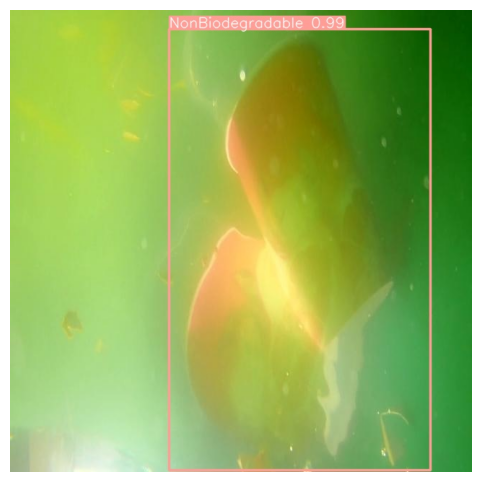

In [ ]:
image_path_2 = '/content/drive/MyDrive/y8_data/runs/detect/predict/frame1034_jpg.rf.530302b1c4fb45e57e10590df798be7b.jpg'
image = imread(image_path_2)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

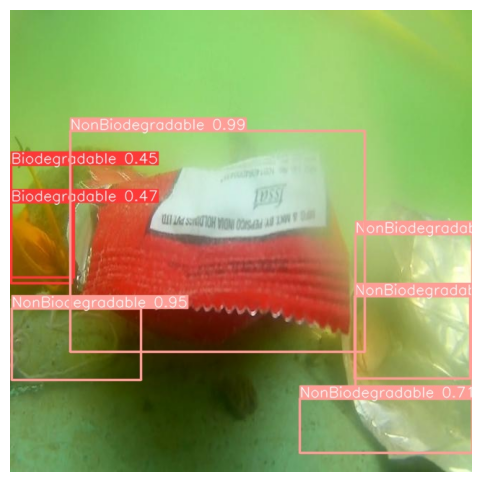

In [ ]:
image_path_3 = '/content/drive/MyDrive/y8_data/runs/detect/predict/frame_281_jpg.rf.4bb1cecd379523ff9c1a4105a8cef49c.jpg'
image = imread(image_path_3)
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()